In [1]:
import numpy as np
data=np.loadtxt("NGC_7331-HI-Plot3D-data.txt")
data[:,0]=data[:,0]/1000
xdata=data[:,0]
ydata=data[:,1]

In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

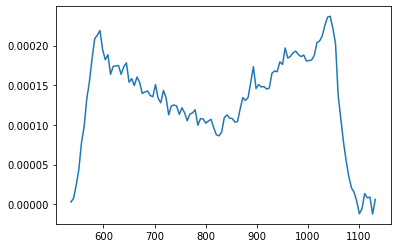

In [3]:
plt.plot(data[:,0],data[:,1])

In [4]:
weight_sum=np.sum(data[:,1])
np.sum(data[:,0]*data[:,1])/weight_sum 
#velocity with which the galaxy is moving away from the Earth

822.8259805377506

In [5]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [6]:
def func_fit(xdata,ydata,peak):
    # peak=1 if we want to fit the leftmost peak
    # peak=2 if we want to fit the rightmost peak
    global half_max1
    global half_max2
    n = len(xdata)                         
    mean = (xdata[-1]+xdata[0])/2        
    sigma = sum(ydata*(xdata-mean)**2)
    popt,pcov = curve_fit(gaus,xdata,ydata,p0=[1,mean,sigma])
    a_g,mean_g,sigma_g=popt
    if peak==1:
        half_max1 = (mean_g-(-2*sigma_g**2*np.log(max(gaus(xdata,*popt))/(2*a_g)))**(1/2))
    else:
        half_max2 = (mean_g+(-2*sigma_g**2*np.log(max(gaus(xdata,*popt))/(2*a_g)))**(1/2))
    plt.plot(xdata,gaus(xdata,*popt),label="fit")
    plt.legend()

In [7]:
xdata1=xdata[99:]
ydata1=ydata[99:]

In [9]:
xdata2=xdata[:23]
ydata2=ydata[:23]

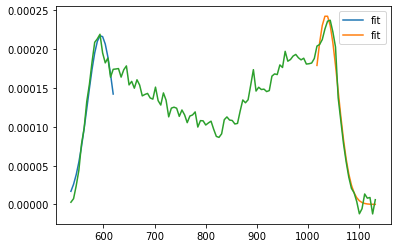

In [10]:
func_fit(xdata1,ydata1,1)
func_fit(xdata2,ydata2,2)
plt.plot(xdata,ydata)

In [11]:
half_max2-half_max1
# observed rotational velocity of the galaxy

499.0468756414325